In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
raw_data = np.genfromtxt(r'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv',encoding='utf-8', delimiter=',',dtype = None)
title = raw_data[0,:]
data = raw_data[1:,:]

In [6]:
def question(x):
    min = np.min(x)
    max = np.max(x)
    mean = np.mean(x)
    median = np.median(x)
    value,ind = np.unique(x,return_counts=True)
    mode = value[np.where(ind==np.max(ind))]
    var = np.var(x)
    standard = np.std(x)
    return f'Min = {min:.2f}\nMax = {max:.2f}\nMedian = {median:.2f}\nMean = {mean:.2f}\nMode = {list(mode)}\nVar = {var:.2f}\nStandard = {standard:.2f}'

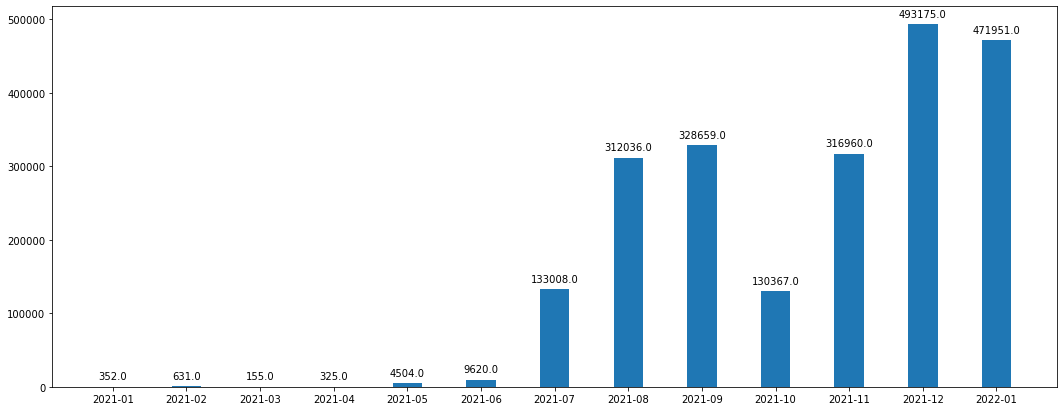

In [5]:
vietnam = data[np.where((data[:,2]=='Vietnam')&(np.array(data[:,3],dtype=np.datetime64)>=np.datetime64('2021-01-01')))]
new_cases = vietnam[:,5].astype(float)
date = np.array(vietnam[:,3],dtype=np.datetime64).astype('datetime64[M]')#.astype(int) % 12 + 1
month = np.unique(date)
sums = []
for i in month:
    sums.append(new_cases[date == i].sum())
fig = plt.figure(figsize =(18, 7))
plt.bar(np.arange(len(sums)),sums,width = 0.4)
plt.xticks(np.arange(len(sums)),month)
for i in range(len(sums)):
    plt.text(i, sums[i]+10000, sums[i], ha = 'center')
plt.autoscale()
plt.show()

In [8]:
print(question(new_cases))

Min = 0.00
Max = 39132.00
Median = 2787.00
Mean = 5616.69
Mode = [1.0, 9.0]
Var = 46398441.83
Standard = 6811.64


In [ ]:
delay_distance = raw_data[1:,[np.where(title == '"dep_delay"')[0][0],np.where(title == '"distance"')[0][0]]]
    x = delay_distance[np.where(arrdelay !='NA')].astype(float)

    # Tạo các indices ngẫu nhiên
    # np.random.seed(10)
    rand_indices = np.arange(y.size)
    np.random.shuffle(rand_indices)

    # Chia dữ liệu ra thành 2 tập train và test
    N_TRAIN = int(y.size * 0.8)
    train_indices = rand_indices[0:N_TRAIN]
    test_indices = rand_indices[N_TRAIN:]
    x_train, y_train = x[train_indices], y[train_indices]
    x_test, y_test = x[test_indices], y[test_indices]

    # Tạo
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train, y_train)
    x = model.coef_
    b = model.intercept_
    # # Dự đoán
    # print(np.sum(model.coef_*x_train[0]) + model.intercept_)
    # delay = model.predict([x_train[0]]).squeeze()
    print(f'Mô hình là {x[0]:.5f}X1 + {x[1]:.5f}X2+({b:.5f})')
    #Đánh giá R2
    r2 = model.score(x_train, y_train)
    print(f'2 biến giải thích {r2*100:.2f}% kết quả thời gian đến nơi trễ')

    # Mong đợi Tỷ lệ lỗi 5%
    y_predict = model.predict(x_train)
    err = y_predict - y_train
    print(f'Độ lệch của khoảng lỗi {np.mean(abs(err))/np.mean(y):.3f}')

    # Đồ thị biến động của điểm dự báo so với thực tế
    plt.figure(figsize=[12,12]) 
    plt.scatter(y_predict, y_train)
    plt.show()